## CIFAR-10 Multiple Classes

In [1]:
import pandas as pd
import numpy as np

In [31]:
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
len(x_train)

50000

In [34]:
import matplotlib.pyplot as plt

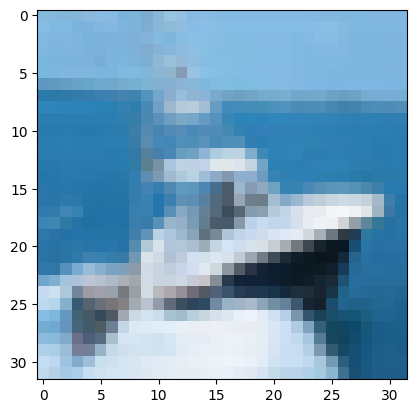

In [8]:
plt.imshow(x_train[8])

## PreProcessing

In [35]:
x_train.shape

(50000, 32, 32, 3)

In [36]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [37]:
x_train.max()

255

In [38]:
x_train=x_train/255

In [39]:
x_test=x_test/255

## Labels

In [40]:
from tensorflow.keras.utils import to_categorical

In [41]:
y_train.shape

(50000, 1)

In [42]:
y_cat_train=to_categorical(y_train,10)

In [45]:
y_train[0]

array([6], dtype=uint8)

In [44]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [25]:
y_cat_test = to_categorical(y_test,10)

## Building the Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [27]:
model=Sequential()

## FIRST SET OF LAYERS
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
## SECOND SET OF LAYERS
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

C:\Users\fakthar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [46]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3542 - loss: 1.7784 - val_accuracy: 0.5208 - val_loss: 1.3108
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5579 - loss: 1.2527 - val_accuracy: 0.5949 - val_loss: 1.1592
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6303 - loss: 1.0622 - val_accuracy: 0.6340 - val_loss: 1.0439
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6774 - loss: 0.9334 - val_accuracy: 0.5880 - val_loss: 1.2423
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7098 - loss: 0.8462 - val_accuracy: 0.6421 - val_loss: 1.0533
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7298 - loss: 0.7811 - val_accuracy: 0.6634 - val_loss: 1.0170
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7567 - loss: 0.7124 - val_accuracy: 0.6938 - val_loss: 0.9450
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7757 - loss: 0.6576 - 

## Evaluation of the Model

In [47]:
losses = pd.DataFrame(model.history.history)

In [49]:
losses.tail()

,accuracy,loss,val_accuracy,val_loss
5,0.73036,0.784388,0.6634,1.016986
6,0.75148,0.725037,0.6938,0.945041
7,0.77074,0.673001,0.6890,1.009423
8,0.78630,0.626889,0.6720,1.124415
9,0.80314,0.583169,0.6806,1.060490


<Axes: >

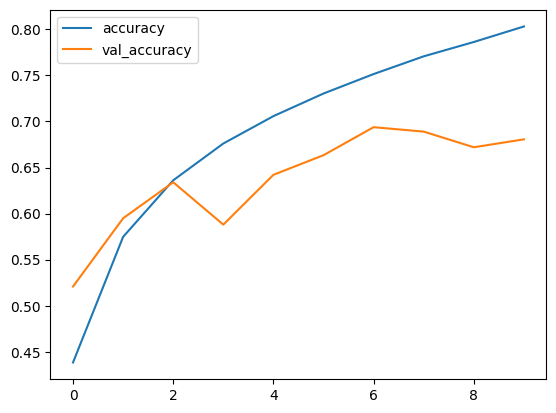

In [51]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

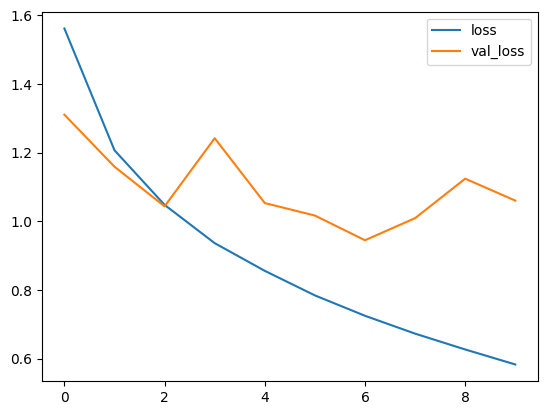

In [52]:
losses[['loss','val_loss']].plot()

In [54]:
model.metrics_names

['loss', 'compile_metrics']

In [53]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[1.0604904890060425, 0.6805999875068665]


In [55]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [61]:
predictions

array([[4.54707444e-03, 1.90442181e-04, 2.80082766e-02, ...,
        7.01483265e-02, 2.64847968e-02, 1.53876527e-03],
       [2.20412461e-04, 5.35165310e-01, 1.08407612e-08, ...,
        1.63754302e-10, 4.60355937e-01, 4.25813673e-03],
       [8.57114196e-02, 6.25226498e-01, 9.16540157e-05, ...,
        9.61873389e-04, 1.66559935e-01, 1.20849036e-01],
       ...,
       [6.29516439e-10, 2.10331965e-08, 2.50153639e-03, ...,
        5.45904215e-04, 9.39037363e-08, 1.07982189e-07],
       [1.15354070e-02, 6.46391273e-01, 2.49988679e-03, ...,
        2.23174226e-02, 1.89019593e-05, 4.07226034e-04],
       [2.19275588e-16, 1.99260080e-16, 1.19160159e-11, ...,
        9.99999523e-01, 6.57894533e-19, 2.20131412e-15]], dtype=float32)

In [56]:
predicted_class = np.argmax(predictions,axis=1)
print(predicted_class)

[3 1 1 ... 5 1 7]


In [57]:
predictions.shape

(10000, 10)

In [58]:
predicted_class.shape

(10000,)

In [59]:
print(classification_report(y_test,predicted_class))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.75      0.84      0.79      1000
           2       0.64      0.52      0.58      1000
           3       0.46      0.56      0.50      1000
           4       0.72      0.50      0.59      1000
           5       0.64      0.53      0.58      1000
           6       0.67      0.83      0.74      1000
           7       0.67      0.80      0.73      1000
           8       0.81      0.76      0.78      1000
           9       0.76      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [60]:
confusion_matrix(y_test,predicted_class)

array([[730,  35,  33,  27,  15,   4,  15,  22,  69,  50],
       [ 14, 841,   4,   7,   1,   3,  30,  13,  22,  65],
       [ 72,  16, 522, 107,  52,  69,  93,  42,  17,  10],
       [ 24,  18,  59, 555,  39, 118,  86,  67,  20,  14],
       [ 28,   5,  77, 110, 497,  38, 103, 119,  13,  10],
       [ 13,  12,  43, 239,  26, 526,  38,  84,   4,  15],
       [  6,   9,  34,  70,  18,  10, 831,  11,   6,   5],
       [ 12,   6,  22,  56,  30,  35,  16, 796,   4,  23],
       [ 77,  58,   9,  23,   7,   8,  16,   5, 755,  42],
       [ 29, 120,  10,  20,   3,   5,  13,  22,  25, 753]], dtype=int64)

## Predicting the given Image

In [71]:
my_image = x_test[56]

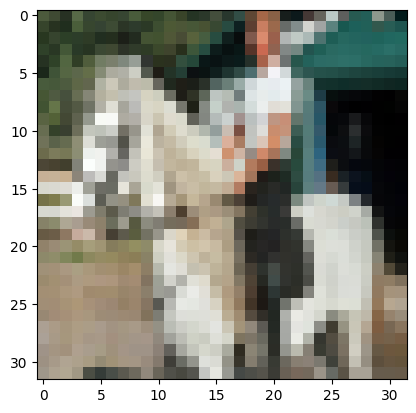

In [72]:
plt.imshow(my_image)

In [73]:
model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[3.7919248e-03, 1.2052320e-04, 2.0078765e-02, 5.9209771e-02,
        1.8225037e-01, 1.3014899e-01, 1.4159063e-02, 5.9011596e-01,
        9.7179793e-05, 2.7430457e-05]], dtype=float32)

In [74]:
predictions = model.predict(my_image.reshape(1,32,32,3))

# Convert predicted probabilities to class labels
predicted_class = np.argmax(predictions, axis=1)

# Print the predicted class
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[7]
